In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('./updated_loan.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


In [37]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [38]:
df["Dependents"].replace("3+", 3, inplace=True)

In [39]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

## Handle Missing Data

In [40]:
missing_value = pd.DataFrame({
  'Missing Value' : df.isnull().sum(),
  'Percentage' : (df.isnull().sum() / len(df)) * 100
})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Credit_History,50,8.143322
EMI,36,5.863192
Loan_Amount_per_year,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
CoapplicantIncome,0,0.000000


In [41]:
pd.crosstab(df["Credit_History"], df["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [42]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df["Credit_History"], df["Loan_Status"]))

Chi2ContingencyResult(statistic=174.63729658142535, pvalue=7.184759548750746e-40, dof=1, expected_freq=array([[ 28.2464539,  60.7535461],
       [150.7535461, 324.2464539]]))

<Axes: xlabel='Credit_History', ylabel='count'>

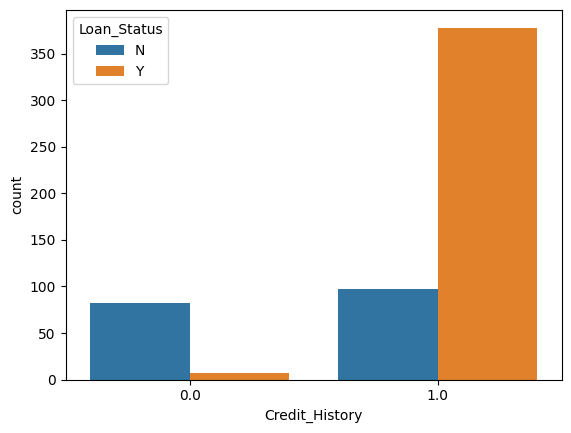

In [43]:
sns.countplot(x=df["Credit_History"], hue=df["Loan_Status"])

Credit History and Loan Status are Depenedent

In [44]:
df["Credit_History"]=df["Credit_History"].fillna(2) # 2 is to be understood as missing in original data

In [46]:
df["Credit_History"].value_counts()


Credit_History
1.0    475
0.0     89
2.0     50
Name: count, dtype: int64

In [13]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [14]:
df["Self_Employed"].isna().sum()

32

In [15]:
pd.crosstab(df["Self_Employed"], df["Loan_Status"])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [16]:
chi2_contingency(pd.crosstab(df["Self_Employed"], df["Loan_Status"]))

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[157.21649485, 342.78350515],
       [ 25.78350515,  56.21649485]]))

In [17]:
df["Self_Employed"].fillna("Other", inplace=True)

In [18]:
df["Self_Employed"].value_counts()

Self_Employed
No       500
Yes       82
Other     32
Name: count, dtype: int64

In [20]:
pd.crosstab(df["Self_Employed"], df["Loan_Status"])

Loan_Status,N,Y
Self_Employed,,
No,157,343
Other,9,23
Yes,26,56


In [21]:
chi2_contingency(pd.crosstab(df["Self_Employed"], df["Loan_Status"]))

Chi2ContingencyResult(statistic=0.15849843135909122, pvalue=0.9238096679003514, dof=2, expected_freq=array([[156.35179153, 343.64820847],
       [ 10.00651466,  21.99348534],
       [ 25.64169381,  56.35830619]]))

## SImple Imputer

In [22]:
from sklearn.impute import SimpleImputer #scikit-learn 

In [24]:
# example
a = pd.DataFrame([10,10,20,10,30,10, np.nan, 50])
a

,0
0,10.0
1,10.0
2,20.0
3,10.0
4,30.0
5,10.0
6,NaN
7,50.0


In [25]:
a.mean()

0    20.0
dtype: float64

In [26]:
a.median()

0    10.0
dtype: float64

In [27]:
SimpleImputer(strategy='mean').fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [20.],
       [50.]])

In [28]:
SimpleImputer(strategy='most_frequent').fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [29]:
SimpleImputer(strategy='median').fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [32]:
SimpleImputer(strategy='constant',fill_value=100).fit_transform(a)  # Use any number

array([[ 10.],
       [ 10.],
       [ 20.],
       [ 10.],
       [ 30.],
       [ 10.],
       [100.],
       [ 50.]])

In [47]:
num_missing = ['EMI', 'Loan_Amount_per_year',  'LoanAmount',  'Loan_Amount_Term']
median_imputer = SimpleImputer(strategy = 'median')
for col in num_missing:
    df[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(df[col])))

In [48]:
cat_missing = ['Gender', 'Married','Dependents']
freq_imputer = SimpleImputer(strategy = 'most_frequent') # mode
for col in cat_missing:
    df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[col])))

In [50]:
df.isna().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
Income_bin               0
TotalIncome              0
TotalIncome_bin          0
Loan_Amount_per_year     0
EMI                      0
Able_to_pay_EMI          0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         582 non-null    object 
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            614 non-null    float64
 8   Loan_Amount_Term      614 non-null    float64
 9   Credit_History        614 non-null    float64
 10  Property_Area         614 non-null    object 
 11  Loan_Status           614 non-null    object 
 12  Income_bin            614 non-null    object 
 13  TotalIncome           614 non-null    float64
 14  TotalIncome_bin       614 non-null    object 
 15  Loan_Amount_per_year  6

# Outliers

In [54]:
df_num = df.select_dtypes(include=np.number)

In [55]:
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,5849,0.0,128.0,30.0,1.0,5849.0,4.383333,365.277778,0
1,4583,1508.0,128.0,30.0,1.0,6091.0,4.266667,355.555556,1
2,3000,0.0,66.0,30.0,1.0,3000.0,2.200000,183.333333,1
3,2583,2358.0,120.0,30.0,1.0,4941.0,4.000000,333.333333,1
4,6000,0.0,141.0,30.0,1.0,6000.0,4.700000,391.666667,1
...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,30.0,1.0,2900.0,2.366667,197.222222,1
610,4106,0.0,40.0,15.0,1.0,4106.0,2.666667,222.222222,1
611,8072,240.0,253.0,30.0,1.0,8312.0,8.433333,702.777778,1
612,7583,0.0,187.0,30.0,1.0,7583.0,6.233333,519.444444,1


In [56]:
df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'TotalIncome',
       'Loan_Amount_per_year', 'EMI', 'Able_to_pay_EMI'],
      dtype='object')

In [57]:
df_num.drop(["Credit_History","Able_to_pay_EMI"], axis=1, inplace=True)
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667


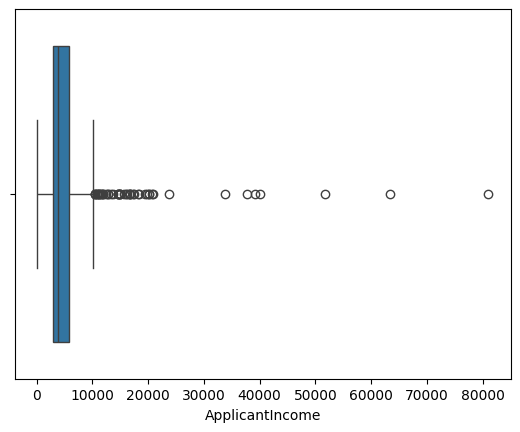

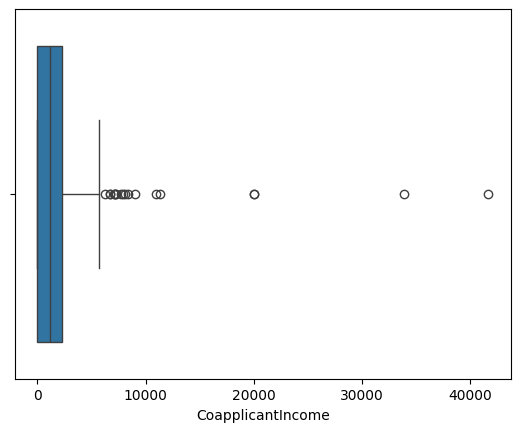

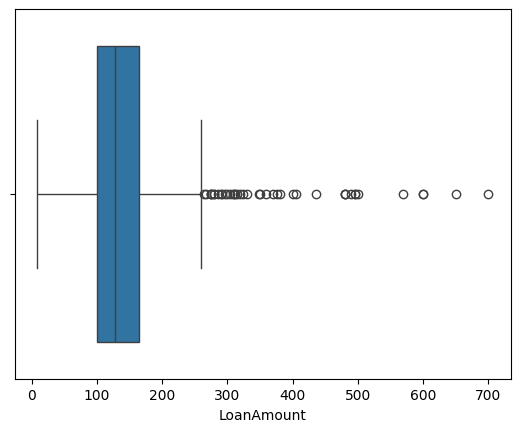

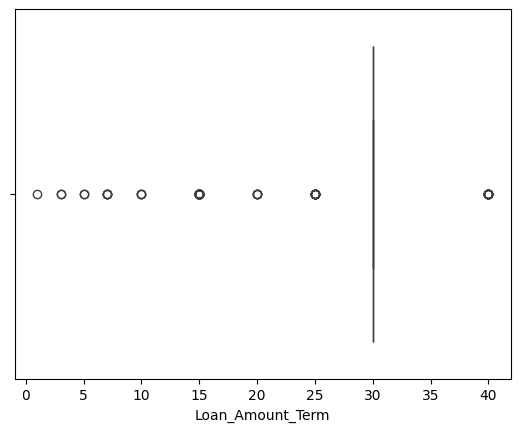

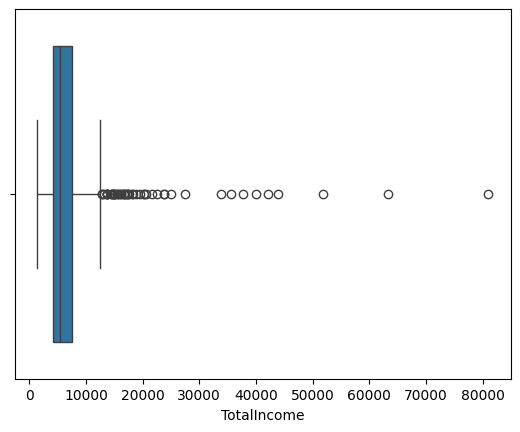

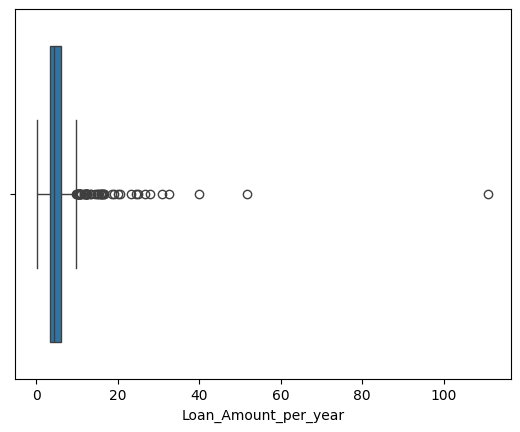

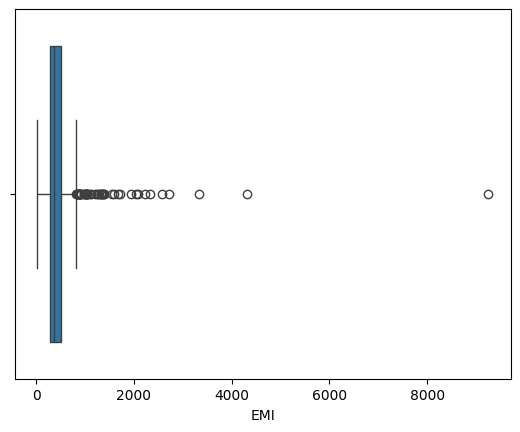

In [58]:
for col in enumerate(df_num):
  sns.boxplot(x=col[1],data=df_num)
  plt.show()

### IQR

In [59]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1 
print(IQR)

ApplicantIncome         2917.500000
CoapplicantIncome       2297.250000
LoanAmount                64.500000
Loan_Amount_Term           0.000000
TotalIncome             3355.750000
Loan_Amount_per_year       2.500000
EMI                      208.333333
dtype: float64


In [60]:
df.shape

(614, 18)

In [65]:
df_iqr = df_num[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

In [66]:
df_iqr.shape
# Typical values

(458, 7)

In [67]:
df_iqr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667


### Z-Score

In [68]:
from scipy.stats import zscore

In [70]:
zscore_LoanAmount = zscore(df_num["LoanAmount"])
zscore_LoanAmount

0     -0.211241
1     -0.211241
2     -0.948996
3     -0.306435
4     -0.056551
         ...   
609   -0.889500
610   -1.258378
611    1.276168
612    0.490816
613   -0.151745
Name: LoanAmount, Length: 614, dtype: float64

In [76]:
row_index_less = np.where(zscore_LoanAmount < -3)
print(row_index_less)

(array([], dtype=int64),)


We are getting zero values less than -3 because data is right skewed

In [74]:
row_index_more = np.where(zscore_LoanAmount > 3)
print(row_index_more)

(array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
       561, 604], dtype=int64),)


In [77]:
len(row_index_less[0]) + len(row_index_more[0])

15

In [84]:
df_LoanAmount_zscore = df["LoanAmount"][~((zscore_LoanAmount < -3) | (zscore_LoanAmount > 3))]

In [85]:
df_LoanAmount_zscore.shape

(599,)

# Categorical Data to Numeric

In [86]:
df_iqr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667


In [89]:
num = df_iqr.select_dtypes(include=np.number)
# num.drop(['Able_to_pay_EMI','Credit_History'], axis=1, inplace=True)
num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Amount_per_year,EMI
0,5849,0.0,128.0,30.0,5849.0,4.383333,365.277778
1,4583,1508.0,128.0,30.0,6091.0,4.266667,355.555556
2,3000,0.0,66.0,30.0,3000.0,2.200000,183.333333
3,2583,2358.0,120.0,30.0,4941.0,4.000000,333.333333
4,6000,0.0,141.0,30.0,6000.0,4.700000,391.666667


In [91]:
cat = df.select_dtypes(include=['object'])
cat.drop('Loan_Status',axis=1,inplace=True)
cat['Able_to_pay_EMI'] = df['Able_to_pay_EMI']
cat['Credit_History'] = df['Credit_History']
cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Income_bin,TotalIncome_bin,Able_to_pay_EMI,Credit_History
0,Male,No,0,Graduate,No,Urban,Medium,High,0,1.0
1,Male,Yes,1,Graduate,No,Rural,Medium,High,1,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Average,Low,1,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Average,Average,1,1.0
4,Male,No,0,Graduate,No,Urban,Medium,High,1,1.0


In [92]:
Target = df['Loan_Status']
Target.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

- One Hot Encoding
- Label Encoding
- Target Encoding

In [93]:
cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Income_bin', 'TotalIncome_bin', 'Able_to_pay_EMI',
       'Credit_History'],
      dtype='object')

In [94]:
Target.value_counts() # Loan_Status

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder
df_iqr = df

In [101]:
col = 'Loan_Status'
label_encoder  = LabelEncoder()
df_iqr[col] = label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()
df_iqr.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,1,Medium,5849.0,High,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,Medium,6091.0,High,4.266667,355.555556,1


In [102]:
col="Gender"
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()
df_iqr.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,1,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,1,Medium,5849.0,High,4.383333,365.277778,0
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,Medium,6091.0,High,4.266667,355.555556,1


In [103]:
col="Married"
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()
df_iqr.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,1,0,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,1,Medium,5849.0,High,4.383333,365.277778,0
1,1,1,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,Medium,6091.0,High,4.266667,355.555556,1


In [105]:
col="Education"
df_iqr[col]=label_encoder.fit_transform(df_iqr[col])
df_iqr[col].value_counts()
df_iqr.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,1,0,0,0,No,5849,0.0,128.0,30.0,1.0,Urban,1,Medium,5849.0,High,4.383333,365.277778,0
1,1,1,1,0,No,4583,1508.0,128.0,30.0,1.0,Rural,0,Medium,6091.0,High,4.266667,355.555556,1


### Target Encoding

In [106]:
!pip install --upgrade category_encoders


   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 81.9/81.9 kB 4.8 MB/s eta 0:00:00


In [107]:
from category_encoders import TargetEncoder


In [108]:
pd.crosstab(df_iqr["Property_Area"], df_iqr["Loan_Status"])


Loan_Status,0,1
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [109]:
pd.crosstab(df_iqr["Property_Area"], df_iqr["Loan_Status"],normalize="index")



Loan_Status,0,1
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


In [110]:
col="Property_Area"
te=TargetEncoder()

df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()


Property_Area
0.768240    233
0.658416    202
0.614525    179
Name: count, dtype: int64

In [111]:
col="Self_Employed"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

col="Dependents"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

col="Income_bin"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

col="TotalIncome_bin"
te=TargetEncoder()
df_iqr[col]=te.fit_transform(df_iqr[col],df_iqr["Loan_Status"])
df_iqr[col].value_counts()

TotalIncome_bin
0.690583    223
0.712264    212
0.681818    132
0.581573     47
Name: count, dtype: int64

In [112]:
df_iqr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,1,0,0.686111,0,0.686000,5849,0.0,128.0,30.0,1.0,0.658416,1,0.685315,5849.0,0.712264,4.383333,365.277778,0
1,1,1,0.647070,0,0.686000,4583,1508.0,128.0,30.0,1.0,0.614525,0,0.685315,6091.0,0.712264,4.266667,355.555556,1
2,1,1,0.686111,0,0.682936,3000,0.0,66.0,30.0,1.0,0.658416,1,0.703540,3000.0,0.581573,2.200000,183.333333,1
3,1,1,0.686111,1,0.686000,2583,2358.0,120.0,30.0,1.0,0.658416,1,0.703540,4941.0,0.690583,4.000000,333.333333,1
4,1,0,0.686111,0,0.686000,6000,0.0,141.0,30.0,1.0,0.658416,1,0.685315,6000.0,0.712264,4.700000,391.666667,1
